# Exercise 7  - Odin Kvarving

# Tasks

* Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).

* Plot this metric while increasing the number of clusters, e.g., $k=2..30$ (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).

* Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import array as arr

data = pd.read_csv("data/agaricus-lepiota.data")
mushrooms = pd.get_dummies(data)
data.head()


,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [131]:
from sklearn.preprocessing import LabelEncoder

# Transfrom binary categories to either 0 or 1:
labelencoder=LabelEncoder()
for col in data.columns:
    if len(data[col].value_counts())==2:
        
        data[col]=labelencoder.fit_transform(data[col])
    
data.head()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,1,p,1,0,1,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,1,a,1,0,0,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,1,l,1,0,0,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,1,p,1,0,1,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,0,n,1,1,0,k,...,s,w,w,p,w,o,e,n,a,g


In [134]:
# X is all categories except 'edibility' 
X = mushrooms.drop(['edibility_e', 'edibility_p'], axis=1)
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [177]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

result = []
for i in range(2, 31):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    result.append(metrics.silhouette_score(X, kmeans.labels_, metric='euclidean'))

print("Metrics-silhouette-score per n_clusters: ")
for i in result:
    print(i, end = ' ')



Metrics-silhouette-score per n_clusters: 
0.16223992558489375 0.21591966205500285 0.22500242403315623 0.252653154094524 0.2692313032995274 0.2762398240279256 0.2815170135701803 0.2937239335566394 0.23137151885963428 0.2612859213227335 0.20390178873893552 0.20205486432642755 0.1519140933874899 0.17480280349781002 0.20217167828988986 0.137408992775569 0.14503944333576088 0.1334756950667594 0.1664618432025881 0.16414295321823563 0.149648593089169 0.147490900368699 0.15608906158095218 0.15845610736076882 0.1434656956407841 0.14281680311099915 0.13779278447372187 0.16335791569514702 0.15178036018895255 

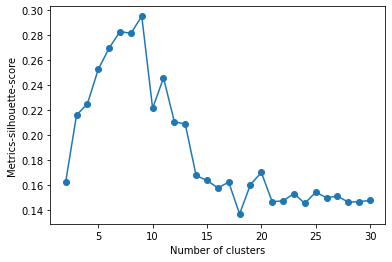

In [172]:
plt.figure()
plt.plot(range(2,31), result, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Metrics-silhouette-score")
plt.show()

In [173]:
index = np.argmax(result)
a = arr.array('i', [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

clusters = a[index]

print("Metrics-silhouette-score:", result[index])
print("Optimal number of clusters:", clusters)

Metrics-silhouette-score: 0.29524050297881854
Optimal number of clusters: 9


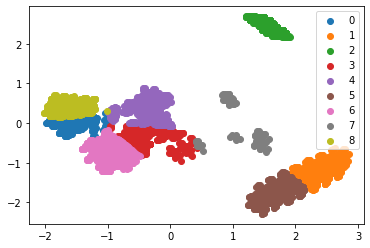

In [175]:
pca = PCA(2)

df = pca.fit_transform(mushrooms)

kmeans = KMeans(n_clusters=clusters)

label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

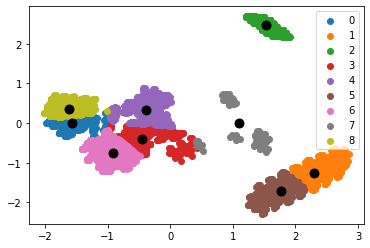

In [176]:
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()